In [3]:
from tensorflow import keras

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
X_train_full.shape

(60000, 28, 28)

In [13]:
X_train_full[:5]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
   

In [22]:
y_train_full[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [14]:
X_train_full[0].max()

255

In [15]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [64]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [65]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=keras.optimizers.SGD(lr=0.1),
             metrics=["accuracy"])

In [53]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))


Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2644 - accuracy: 0.9223 - val_loss: 0.1308 - val_accuracy: 0.9614
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1083 - accuracy: 0.9669 - val_loss: 0.0911 - val_accuracy: 0.9716
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0741 - accuracy: 0.9779 - val_loss: 0.0777 - val_accuracy: 0.9778
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0526 - accuracy: 0.9843 - val_loss: 0.0724 - val_accuracy: 0.9790
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0411 - accuracy: 0.9871 - val_loss: 0.0760 - val_accuracy: 0.9774
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0284 - accuracy: 0.9916 - val_loss: 0.0612 - val_accuracy: 0.9808
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0210 - accuracy: 0.9939 - val_loss: 0.0636 - val_accuracy:

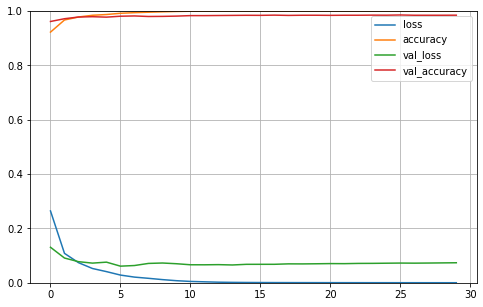

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [55]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 16.5322 - accuracy: 0.9842


[16.53220558166504, 0.9842000007629395]

In [66]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d_-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [67]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid,y_valid), callbacks=[tensorboard_cb])

Epoch 1/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2668 - accuracy: 0.9209 - val_loss: 0.1365 - val_accuracy: 0.9600
Epoch 2/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1084 - accuracy: 0.9675 - val_loss: 0.0989 - val_accuracy: 0.9724
Epoch 3/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0745 - accuracy: 0.9774 - val_loss: 0.0971 - val_accuracy: 0.9708
Epoch 4/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0538 - accuracy: 0.9835 - val_loss: 0.0800 - val_accuracy: 0.9762
Epoch 5/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0415 - accuracy: 0.9870 - val_loss: 0.0681 - val_accuracy: 0.9810
Epoch 6/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0319 - accuracy: 0.9898 - val_loss: 0.0624 - val_accuracy: 0.9816
Epoch 7/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0229 - accuracy: 0.9933 - val_loss: 0.0744 - val_accuracy:

In [2]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6007

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 2888.